In [1]:
# Imports
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

# sklearn Boston Dataset

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

506 data samples, with 13 features each

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
df = pd.DataFrame(boston.data)

In [8]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# sklearn Train Test split
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=4)

In [11]:
# Standardizing the Train and Test Data
# Perform fit on Train data and Transform on both Train and Test Data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# To visualize how the data looks post standardization, lets convert it into a pandas dataframe
standardized_df = pd.DataFrame(X_train)
standardized_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.425469,-0.470768,-0.954686,-0.231455,-0.919581,0.215100,-0.747410,0.454022,-0.764468,-0.976012,0.005460,0.441889,-0.444819
1,-0.426323,2.992576,-1.330157,-0.231455,-1.227311,-0.883652,-1.691588,3.163428,-0.651568,-0.464548,1.616046,0.287498,-0.666438
2,-0.385190,-0.470768,-0.705828,4.320494,-0.423795,-0.125423,0.818985,-0.353904,-0.199967,-0.623278,-0.500725,0.423713,1.226505
3,-0.249268,-0.470768,-0.423497,-0.231455,-0.158805,-0.228336,1.021567,-0.021755,-0.651568,-0.623278,1.155878,-1.185126,1.068407
4,-0.365945,0.395068,-1.030363,-0.231455,0.157472,3.102729,-0.060078,-0.646202,-0.538668,-0.876071,-2.525462,0.306551,-0.752545


In [13]:
standardized_df['house_price'] = Y_train
standardized_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,house_price
0,-0.425469,-0.470768,-0.954686,-0.231455,-0.919581,0.215100,-0.747410,0.454022,-0.764468,-0.976012,0.005460,0.441889,-0.444819,23.9
1,-0.426323,2.992576,-1.330157,-0.231455,-1.227311,-0.883652,-1.691588,3.163428,-0.651568,-0.464548,1.616046,0.287498,-0.666438,18.2
2,-0.385190,-0.470768,-0.705828,4.320494,-0.423795,-0.125423,0.818985,-0.353904,-0.199967,-0.623278,-0.500725,0.423713,1.226505,21.7
3,-0.249268,-0.470768,-0.423497,-0.231455,-0.158805,-0.228336,1.021567,-0.021755,-0.651568,-0.623278,1.155878,-1.185126,1.068407,13.5
4,-0.365945,0.395068,-1.030363,-0.231455,0.157472,3.102729,-0.060078,-0.646202,-0.538668,-0.876071,-2.525462,0.306551,-0.752545,50.0


In [14]:
# Retrieving Random 5 samples from dataset
standardized_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,house_price
352,-0.421647,-0.470768,-1.018720,-0.231455,-0.398151,-0.587019,0.001420,-0.515405,-0.538668,-0.687946,-0.868859,0.401704,-0.441995,22.6
205,-0.168268,-0.470768,1.241383,-0.231455,2.687694,-1.605559,0.909423,-1.062438,-0.538668,-0.058905,-1.743177,0.004887,2.194856,17.8
191,-0.155219,-0.470768,1.241383,-0.231455,2.687694,-1.475404,0.916658,-0.965939,-0.538668,-0.058905,-1.743177,-2.933572,0.475539,13.1
35,-0.407931,0.481652,-0.755308,-0.231455,-1.073446,-0.989592,0.283589,1.935812,-0.312867,-0.488064,0.281560,0.174607,-0.038280,17.6
59,0.443181,-0.470768,1.025997,-0.231455,1.337103,0.081918,0.544051,-0.477515,1.606435,1.487243,0.787744,-0.923428,0.488243,14.9


In [15]:
standardized_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,house_price
111,0.111574,-0.470768,1.025997,-0.231455,1.337103,0.687291,0.771956,-0.564122,1.606435,1.487243,0.787744,-1.109354,0.515063,16.4
75,-0.392820,-0.470768,1.577561,-0.231455,0.576327,0.319527,1.093918,-0.787639,-0.651568,0.140977,1.247912,0.421523,-0.024165,19.2
250,-0.424806,-0.470768,0.259046,-0.231455,-1.022158,-0.022509,-0.541211,0.563541,-0.538668,-0.088300,0.097493,0.326917,-0.060866,21.2
13,0.225702,-0.470768,1.025997,-0.231455,-0.210094,-0.007375,-0.143281,-0.178357,1.606435,1.487243,0.787744,0.441889,-0.286720,23.0
106,2.055917,-0.470768,1.025997,-0.231455,1.567900,-0.649070,0.858777,-0.905370,1.606435,1.487243,0.787744,0.382213,1.318258,10.5


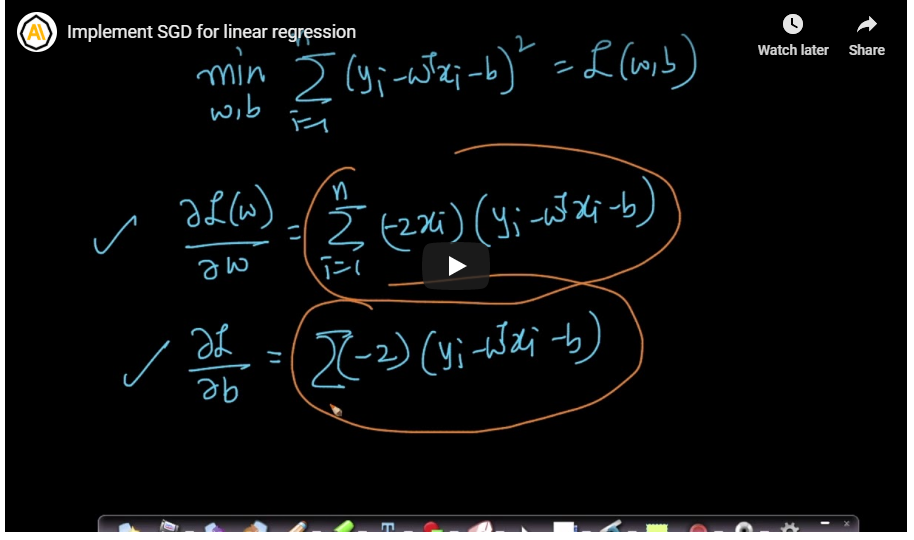

From the optimization function above, we need to compute weights (W) and Bias (B) for the linear regression model.
For a two feature input system, the model is a line equation. 
In the current problem, we have 13 features, so the model is a hyper plane

We need to compute partial derivatives with respect to Weights and Bias for the optimization problem

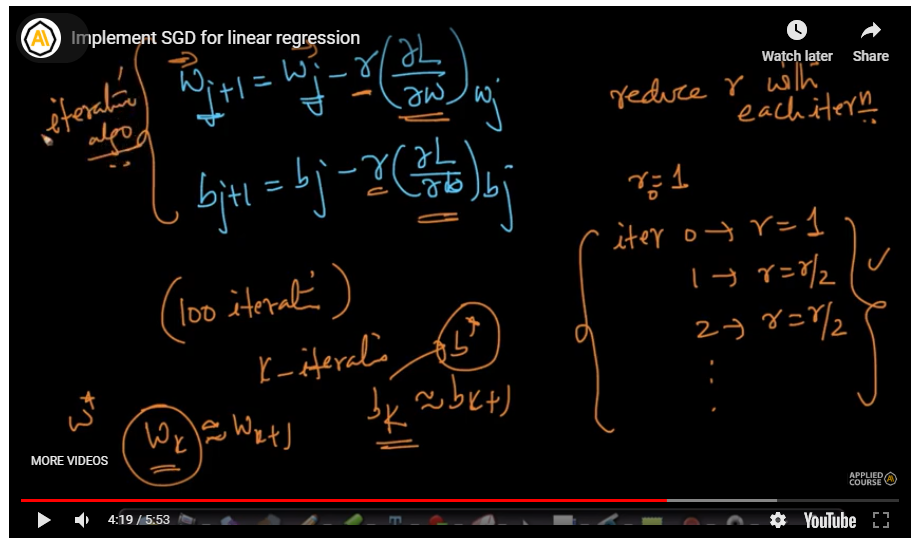

In [68]:
def _customSGD(dataset, learning_rate, n_epochs, batch_size, initialize_random_coefs=False, variable_learning=False):
    """
    # Stochastic Gradient Descent
    -- Gradient Descent computes the cost gradient for all the samples involved in the dataset
       where as the SGD computes cost gradient of 1 sample at each iteration.
    -- Instead of one sample at a time, if a batch_size is provided it then becomes Batch GD
    
    Expectations:
        dataset - a pandas dataframe
        learning_rate - an intezer or float
        n_epochs - an intezer
        batch_Size - an intezer
    
    """
    
    # Raise TypeErrors when required inputs are of not desired format
    
    no_of_training_sample, no_of_features = dataset.shape
    no_of_features -= 1 # subtracing the labels column from features
    
    if initialize_random_coefs:
        # Random initialization
        bias = np.random.rand(1)
        weights = np.random.rand(no_of_features)
    else:
        # Initialization with zeros
        bias = 0
        weights = np.zeros(shape=(1,no_of_features),dtype="double")
        
    # for future add tqdm function hear to know the progress of epochs   
    for _epoch in range(n_epochs):
        # updating learning rate for every 100 epochs
        if variable_learning == True:
            if _epoch%100 == 0:
                learning_rate /= 2.0
        
        # local variables for needing to predict and compute error
        _b, _w, _parderivateW, _parderivateB = bias, weights, np.zeros(shape=(1,no_of_features)), 0
        
        # since this going to be mini batch SGD
        miniBatch = dataset.sample(batch_size)
        
        #  reference - https://stackoverflow.com/questions/40144769/how-to-select-the-last-column-of-dataframe
        ylabels = np.array(miniBatch.iloc[:,-1]) # labels column
        xfeatures = np.array(miniBatch.drop(miniBatch.columns[len(miniBatch.columns)-1], axis=1))
        
        for index in range(batch_size):
            # Refer first image for formulae
            # partial derivative w.r.t Weights
            # dl/dw = Summation(-2x * (y - (wTx+b)))
            _parderivateW += (-2) * (xfeatures[index]) * (ylabels[index] - (np.dot(_w,xfeatures[index]) + _b))
            
            # partial derivate w.r.t bias
            # dl/db = Summation(-2 * (y - (wTx+b)))
            _parderivateB += (-2) * (ylabels[index] - (np.dot(_w, xfeatures[index]) + _b))
            
        # Updating the weights, bias at the end of epoch
        # refer second image for formulae
        bias = (_b - learning_rate*(_parderivateB)/batch_size)
        weights = (_w - learning_rate*(_parderivateW)/batch_size)
        
        # print (bias, weights, f"At the end of epoch {_epoch} out of {n_epochs}")
            
    
    return weights, bias

In [69]:
fweights, fbias = _customSGD(standardized_df, 0.01, 750, 25) # fixed learning rate

In [70]:
print (f"Weights\n================\n{fweights}")

Weights
[[-0.89519037  1.12956652 -0.35030211  1.13923212 -1.35240868  2.366946
  -0.23322673 -3.29670507  2.01243158 -1.33301936 -1.6670795   0.73886308
  -3.70065531]]


In [71]:
print (f"Bias\n================\n{fbias}")

Bias
[22.19157247]


In [82]:
# variable learning rate
vweights, vbias = _customSGD(standardized_df, 0.01, 750, 25, False, True) # fixed learning rate

In [83]:
print (f"Weights\n================\n{vweights}")

Weights
[[-0.70785641  0.42531237 -0.56623238  1.08724266 -0.43664337  2.76976657
  -0.21268316 -1.31358926  0.44666002 -0.37973611 -1.54300038  0.76709466
  -2.62892823]]


In [84]:
print (f"Bias\n================\n{vbias}")

Bias
[19.11943868]


In [72]:
# since we are done with the training lets do inference 
# with fixed learning rate
predicted_house_yhat_list = []
for index in range (len(X_test)):
    yhat = np.dot(fweights, X_test[index]) + fbias
    predicted_house_yhat_list.append(np.asscalar(yhat)) # converting the yhat prediction into a scalar value
    # >>> np.asscalar(np.array([24]))
    # 24

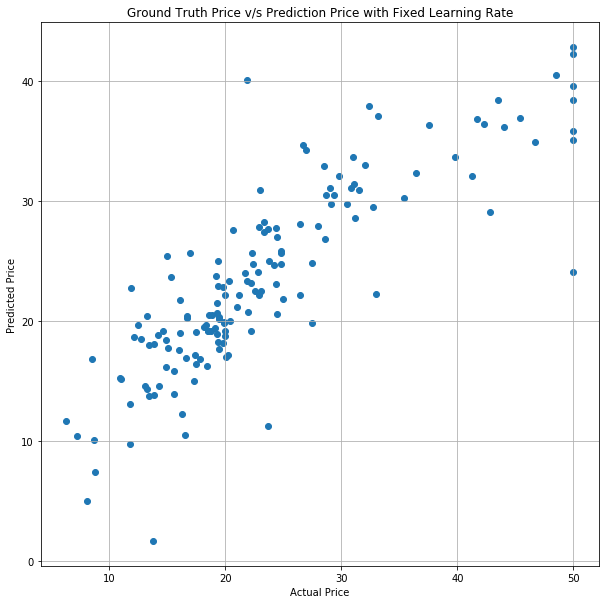

In [73]:
# Lets plot Ground Truth Price v/s Predictions
plt.figure(figsize=(10,10))
plt.title("Ground Truth Price v/s Prediction Price with Fixed Learning Rate")
plt.scatter(Y_test, predicted_house_yhat_list)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.show()

In [85]:
# with Variable Learning rate
vpredicted_house_yhat_list = []
for index in range (len(X_test)):
    yhat = np.dot(vweights, X_test[index]) + vbias
    vpredicted_house_yhat_list.append(np.asscalar(yhat)) # converting the yhat prediction into a scalar value
    # >>> np.asscalar(np.array([24]))
    # 24

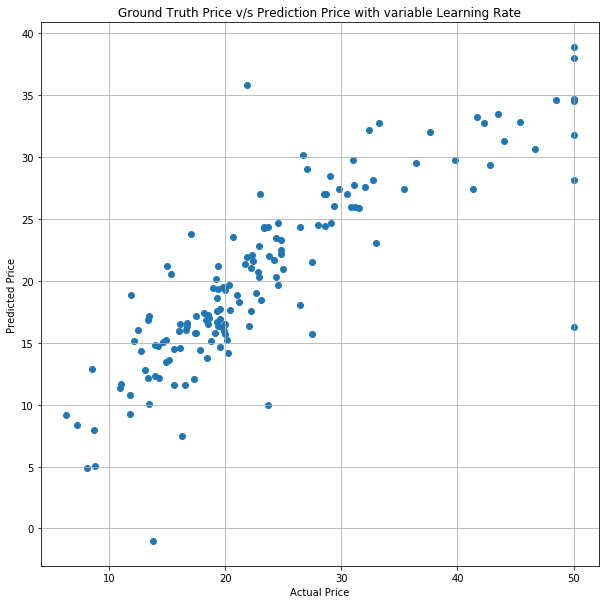

In [86]:
# Lets plot Ground Truth Price v/s Predictions
plt.figure(figsize=(10,10))
plt.title("Ground Truth Price v/s Prediction Price with variable Learning Rate")
plt.scatter(Y_test, vpredicted_house_yhat_list)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.show()

In [87]:
# Mean Squared Error - Fixed LR, Variable LR
MSE_flr = mean_squared_error(Y_test, predicted_house_yhat_list)
MSE_vlr = mean_squared_error(Y_test, vpredicted_house_yhat_list)

print (f"Fixed LR MSE {MSE_flr}")
print (f"Variable LR MSE {MSE_vlr}")

Fixed LR MSE 30.64473411784173
Variable LR MSE 42.52533567999639


In [75]:
# Lets perform the same with inbuilt module of sklearn

sgd = SGDRegressor(learning_rate="constant", eta0=0.01, penalty=None, max_iter=50)
sgd.fit(X_train,Y_train)
y_hat_sgd=sgd.predict(X_test)

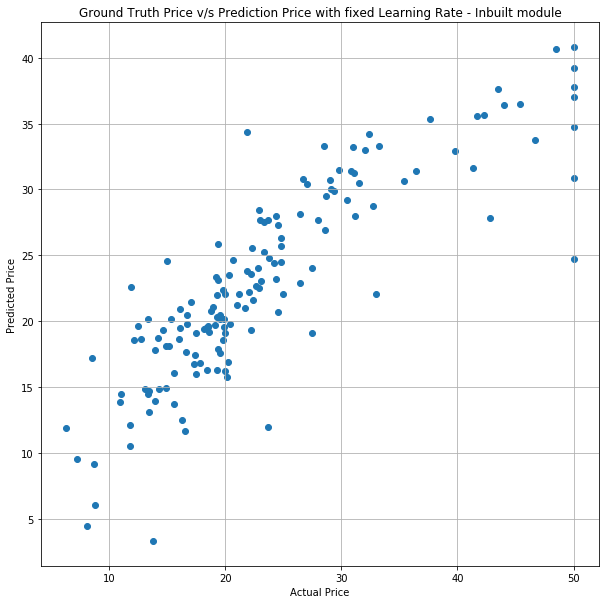

In [76]:
# Lets plot Ground Truth Price v/s Predictions
plt.figure(figsize=(10,10))
plt.title("Ground Truth Price v/s Prediction Price with fixed Learning Rate - Inbuilt module")
plt.scatter(Y_test, y_hat_sgd)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.show()

In [77]:
# Mean Squared Error - Fixed LR, Variable LR
MSE_flr_inbuilt = mean_squared_error(Y_test, y_hat_sgd)

print (f"Fixed LR MSE {MSE_flr_inbuilt}")

Fixed LR MSE 29.7729382260675


## Summarizing the results 

In [78]:
# A tabular representation of weights for all four modes
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Weights - Custom", "Weights - Inbuilt"]

In [79]:
weights_sgd = sgd.coef_

In [80]:
for i in range(12):
    x.add_row([fweights[0][i],weights_sgd[i]])
print(x)

+----------------------+----------------------+
|   Weights - Custom   |  Weights - Inbuilt   |
+----------------------+----------------------+
| -0.8951903669319022  | -0.9957863796826973  |
|  1.129566519981019   |  1.3733331426243682  |
| -0.3503021113827559  | 0.043633719299515004 |
|  1.139232115194231   |  0.3210297525187523  |
| -1.3524086841272596  | -1.6073743441292732  |
|  2.366946004315772   |  1.9590627259886977  |
| -0.23322673440138084 | -0.0808845687432791  |
|  -3.296705073959816  |  -3.231395894872585  |
|  2.012431578586961   |  2.8169369696694315  |
| -1.3330193563306263  |  -2.268061926237042  |
| -1.6670794991024582  |  -1.752852491026695  |
|  0.7388630842189096  |  0.9634424018569003  |
+----------------------+----------------------+


In [81]:
# Custom SGD v/s SGD sklearn implementation
print('MSE of manual implementation = ',MSE_flr)
print('-'*50)
print('MSE of SGD sklearn implementation = ',MSE_flr_inbuilt)

MSE of manual implementation =  30.64473411784173
--------------------------------------------------
MSE of SGD sklearn implementation =  29.7729382260675


## Summary

When compared manual SGD implementation with that of third party module of sklearn we pretty much see the same weights and MSE